In [2]:
import pandas as pd
import math
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, LineString
import descartes
import numpy as np

In [3]:
estados = 'Shapes\México_Estados\México_Estados.shp'
mex = gpd.read_file(estados)
mex.head()

,CODIGO,ESTADO,geometry
0,MX02,Baja California,"MULTIPOLYGON (((-113.13972 29.01778, -113.2405..."
1,MX03,Baja California Sur,"MULTIPOLYGON (((-111.20612 25.80278, -111.2302..."
2,MX18,Nayarit,"MULTIPOLYGON (((-106.62108 21.56531, -106.6475..."
3,MX14,Jalisco,"POLYGON ((-101.52490 21.85664, -101.58830 21.7..."
4,MX01,Aguascalientes,"POLYGON ((-101.84620 22.01176, -101.96530 21.8..."


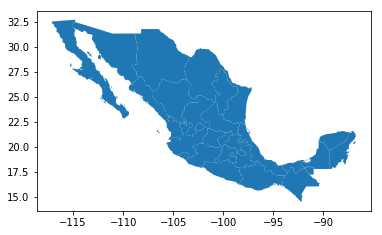

In [4]:
%matplotlib inline
mex.plot()

In [5]:
cobertura = pd.read_excel('PROMTEL Estudio de Cobertura (2).xlsx', index_col=0, sheet_name='Análisis de población')

In [6]:
def distancia(a,b):
    return math.sqrt((a[0]-b[0])**2 + (a[1] - b[1])**2)

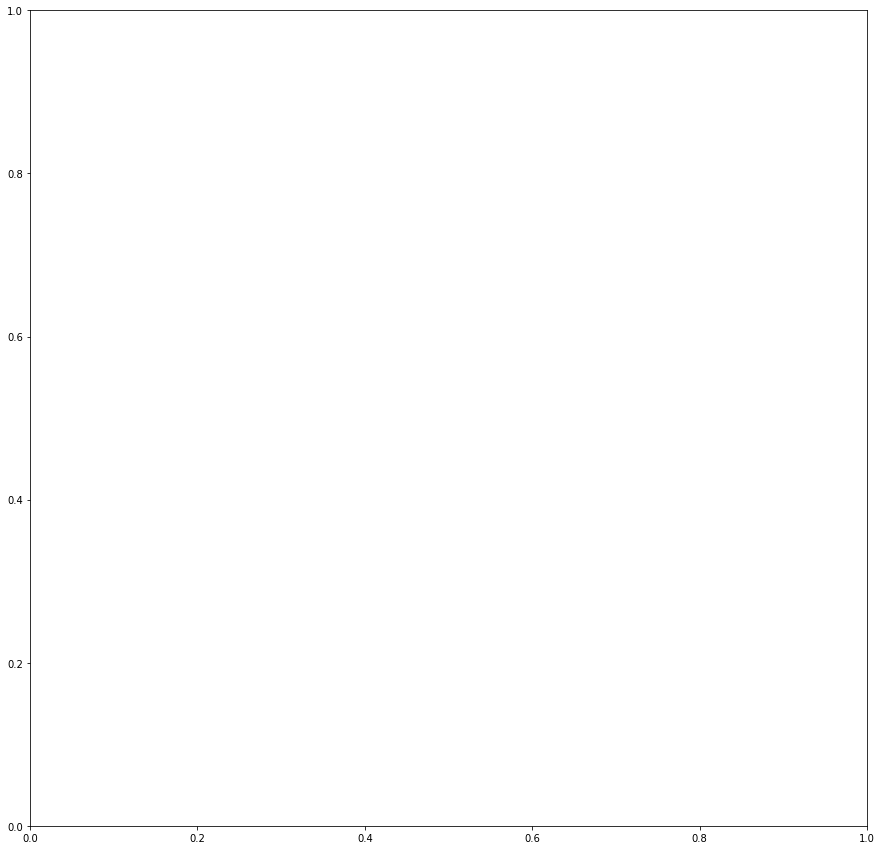

In [7]:
fig,ax=plt.subplots(figsize = (15,15))
#mex.plot(ax=ax)

In [47]:
df = pd.read_csv('terrenos.csv',header=0,encoding = 'unicode_escape')
crs = {'init' : 'epsg:4326'}
df.head()

,Title,Address,Descripcion,Precio,TamaÃ±o,Latitud,Longitud
0,LagunasInterior . Punta TiburÃ³n Residencial; ...,Km. 4.5 Carretera Federal Boca del RÃ­o - AntÃ...,Punta tiburÃ³n residencial se encuentra en la ...,$ 769;500,180 mÂ²,19.067293,-96.080747
1,La Escondida Residencial â Terrenos,Octava Avenida y Veracruz||RincÃ³n de La Sierr...,La Escondida ResidencialResidencias y Lotes de...,$ 711;000,140 mÂ²,25.641346,-100.198342
2,El Molino Residencial & Golf,Paseos El Molino # 302; LeÃ³n; Gto||Balcones d...,El Molino; Residencial & GolfEs un impresionan...,$ 845;719,250 mÂ²,21.185639,-101.699237
3,Club Cenote Residencial,Ruta de los Cenotes Km 19 DesviaciÃ³n Delirios...,Club Cenote ResidencialAmplios Terrenos en el ...,$ 1;039;000,800 mÂ²,20.847873,-87.220608
4,Punta TiburÃ³n Residencial; Marina & Golf - Bo...,Km. 4.5 Carretera Federal Boca del RÃ­o - AntÃ...,Punta tiburÃ³n residencial se encuentra en la ...,$ 723;672,180 mÂ²,19.067293,-96.080747


In [48]:
geometry = [Point(xy) for xy in zip(df['Longitud'], df['Latitud'])]
geometry[:3]

In [49]:
geo_df = gpd.GeoDataFrame(df,
                         crs = crs,
                         geometry = geometry)
geo_df.head()

,Title,Address,Descripcion,Precio,TamaÃ±o,Latitud,Longitud,geometry
0,LagunasInterior . Punta TiburÃ³n Residencial; ...,Km. 4.5 Carretera Federal Boca del RÃ­o - AntÃ...,Punta tiburÃ³n residencial se encuentra en la ...,$ 769;500,180 mÂ²,19.067293,-96.080747,POINT (-96.08075 19.06729)
1,La Escondida Residencial â Terrenos,Octava Avenida y Veracruz||RincÃ³n de La Sierr...,La Escondida ResidencialResidencias y Lotes de...,$ 711;000,140 mÂ²,25.641346,-100.198342,POINT (-100.19834 25.64135)
2,El Molino Residencial & Golf,Paseos El Molino # 302; LeÃ³n; Gto||Balcones d...,El Molino; Residencial & GolfEs un impresionan...,$ 845;719,250 mÂ²,21.185639,-101.699237,POINT (-101.69924 21.18564)
3,Club Cenote Residencial,Ruta de los Cenotes Km 19 DesviaciÃ³n Delirios...,Club Cenote ResidencialAmplios Terrenos en el ...,$ 1;039;000,800 mÂ²,20.847873,-87.220608,POINT (-87.22061 20.84787)
4,Punta TiburÃ³n Residencial; Marina & Golf - Bo...,Km. 4.5 Carretera Federal Boca del RÃ­o - AntÃ...,Punta tiburÃ³n residencial se encuentra en la ...,$ 723;672,180 mÂ²,19.067293,-96.080747,POINT (-96.08075 19.06729)


In [50]:
def cuadricula(xmin,ymin,xmax,ymax, m, n):
    x_step = (xmax-xmin)/m
    y_step = (ymax-ymin)/n
    
    cols = np.linspace(xmin, xmax, m+1)
    rows = np.linspace(ymin, ymax, n+1)

    #cols = list(range(int(np.floor(xmin)), int(np.ceil(xmax)), x_step))
    #rows = list(range(int(np.floor(ymin)), int(np.ceil(ymax)), y_step))
    #rows.reverse()
    rows = np.flip(rows)
    cols = cols[:-1]
    rows = rows[:-1]

    polygons = []
    for x in cols:
        for y in rows:
            polygons.append( Polygon([(x,y), (x+x_step, y), (x+x_step, y-y_step), (x, y-y_step)]) )

    grid = gpd.GeoDataFrame({'geometry':polygons})
    return grid

In [51]:
#mex

In [53]:
precio = [str(row).replace(";","").replace("$","").replace(' ','') for  row in geo_df['Precio']]
tipo_cambio=19.33
precio = [float(row.replace('US',''))*tipo_cambio if 'US' in row else float(row) for row in precio]
geo_df['Precio'].isna().sum()
geo_df['Precio'] = precio
geo_df['Precio'].isna().sum()
geo_df['Tamano'] = [float(str(row).replace(' mÂ²','')) for row in geo_df['TamaÃ±o']]
#precio.isna().sum()

In [68]:

geo_df['Precio/Tam']=[row['Precio']/row['Tamano'] for idx,row in geo_df.iterrows()]
geo_df.head()
geo_df = geo_df.dropna()

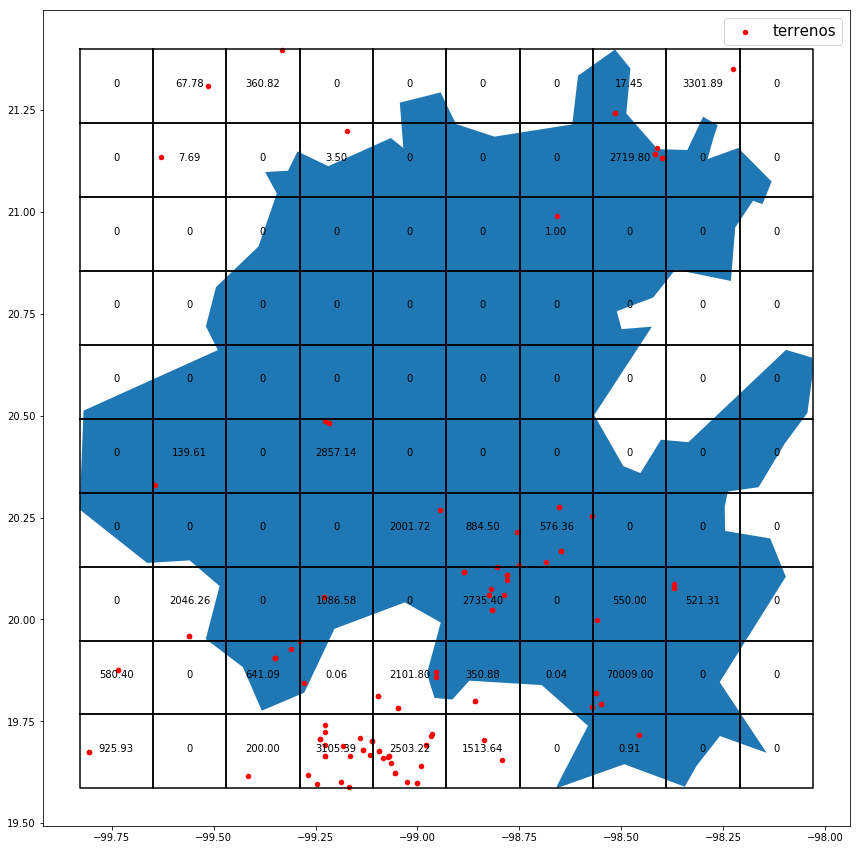

In [72]:
fig, ax = plt.subplots(figsize=(15,15))
mex[mex['ESTADO']=='Hidalgo'].plot(ax=ax)
xmin,ymin,xmax,ymax = mex[mex['ESTADO']=='Hidalgo'].total_bounds
#cuadricula(xmin,ymin,xmax,ymax, 10,10)['geometry'][0:5].plot(ax=ax, alpha=0.5, linewidth=0.5)
cuad = cuadricula(xmin,ymin,xmax,ymax, 10,10)
area_trabajo = geo_df[(geo_df['Latitud']>=ymin) & (geo_df['Latitud']<=ymax) 
    & (geo_df['Longitud']>=xmin) & (geo_df['Longitud']<=xmax)]
for poly in cuad['geometry']:
    x,y = poly.exterior.xy
    c1,c2=poly.centroid.xy
    #print(c1,c2)
    #print(x[0],y[0])
    cantidad=0
    prom=0
    for idx, row in area_trabajo.iterrows():
        #print(row['geometry'])
        if poly.contains(row['geometry']):
            prom += row['Precio/Tam']
            cantidad += 1
    if cantidad>0:
        prom=prom/cantidad
        prom = "%.2f" % prom
    plt.plot(x,y, color='black')
    plt.annotate(s=str(prom), xy=(c1[0],c2[0]), horizontalalignment='center')
area_trabajo.plot(ax = ax, markersize = 20, color = 'red', marker = 'o', label='terrenos')
plt.legend(prop={'size': 15})

c:\programdata\miniconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
